In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score, accuracy_score, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torchvision import models, transforms

In [3]:
import torch
from PIL import Image
from tqdm import tqdm
import os
import nltk
import joblib

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import os

for file in os.listdir('/kaggle/input/skin-cancer-mnist-ham10000'):
    print(file)

hmnist_8_8_RGB.csv
hmnist_28_28_RGB.csv
HAM10000_images_part_1
ham10000_images_part_1
hmnist_8_8_L.csv
HAM10000_images_part_2
ham10000_images_part_2
hmnist_28_28_L.csv
HAM10000_metadata.csv


In [6]:
import pandas as pd

meta_df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
image_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
image_data.head(10)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
5,8,1,3,19,5,10,26,8,13,34,...,12,3,7,5,0,1,4,0,0,2
6,194,147,137,197,148,139,197,148,132,200,...,211,160,163,211,162,166,208,162,166,2
7,161,121,105,169,128,119,172,129,116,176,...,141,103,92,87,59,56,32,18,19,2
8,125,84,85,165,114,118,181,120,125,188,...,119,80,79,62,35,41,19,8,13,2
9,228,179,194,227,174,191,226,165,182,215,...,217,142,156,219,154,166,216,146,154,2


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


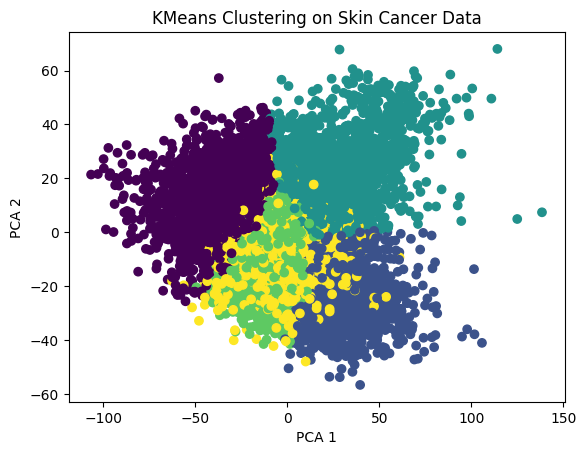

In [8]:
if 'label' in image_data.columns:
    features = image_data.drop('label', axis=1)
else:
    features = image_data.copy()

# Normalize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=20)
clusters = kmeans.fit_predict(scaled_features)

# Plot
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.title("KMeans Clustering on Skin Cancer Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [9]:
print("\nEthical Reflection:")
print("1. Dataset Bias: Images may overrepresent certain skin types, affecting model generalization.")
print("2. Fairness: Unsupervised clustering avoids human labeling bias, but analysis of cluster makeup is crucial.")
print("3. Sustainability: Better early detection tools help prevent severe interventions, saving resources.")
print("4. Accountability: Ensure transparency in data sources and modeling choices.")



Ethical Reflection:
1. Dataset Bias: Images may overrepresent certain skin types, affecting model generalization.
2. Fairness: Unsupervised clustering avoids human labeling bias, but analysis of cluster makeup is crucial.
3. Sustainability: Better early detection tools help prevent severe interventions, saving resources.
4. Accountability: Ensure transparency in data sources and modeling choices.
